### Importing the required Libraries 

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd

### Reading the Dataset 

In [ ]:
train_data = pd.read_csv("train/train.csv")
test_data = pd.read_csv("test/test.csv")

In [3]:
train_data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Preprocessing the Data 

In [4]:
pixel = train_data.drop(columns=["label"],axis=1)

In [5]:
label = train_data.label.values.astype('uint8')

In [6]:
def preprocess(pixel):
    
    data = list()
    for i in range(len(pixel)):
        data.append((pixel.iloc[i].values.reshape(28,28,1).astype('float32')))
    data = np.asarray(data)
    data /= 255.0
    return data

img = preprocess(pixel)

<function matplotlib.pyplot.show(close=None, block=None)>

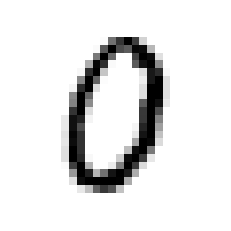

In [7]:

import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(img[5],cmap="binary")
plt.axis('off')
plt.show

### Implementing Convolutional Neural Network 

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [9]:
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout
from keras import Sequential

In [10]:
model = Sequential([
    Conv2D(32,7,activation="relu",padding="same",
          input_shape=[28,28,1]),
    MaxPooling2D(2),
    Conv2D(64,3,activation="relu",padding="same"),
    Conv2D(128,3,activation="relu",padding="same"),
    MaxPooling2D(2),
    Conv2D(256,3,activation="relu",padding="same"),
    Conv2D(256,3,activation="relu",padding="same"),
    MaxPooling2D(2),
    Flatten(),
    Dense(128,activation="relu"),
    Dropout(0.25),
    Dense(64,activation="relu"),
    Dropout(0.25),
    Dense(10,activation="softmax")
])

In [11]:
model.compile(loss="sparse_categorical_crossentropy",
             optimizer='nadam',
             metrics=["accuracy"])

In [12]:
%%time
history = model.fit(img,label,epochs=2)

Epoch 1/2
1313/1313 [==============================] - 301s 228ms/step - loss: 0.2247 - accuracy: 0.9340
Epoch 2/2
1313/1313 [==============================] - 296s 226ms/step - loss: 0.0676 - accuracy: 0.9827
Wall time: 9min 57s


In [13]:
#Preprocessing the Test Data
test_img = preprocess(test_data)

In [14]:
test_img.shape

(28000, 28, 28, 1)

### Creating Submission File for Kaggle Submission 

In [ ]:
# Importing Pandas to create DataFrame
import pandas as pd

# Creating Empty DataFrame and Storing it in variable df
df = pd.DataFrame()

# Printing Empty DataFrame
print(df)


#### Create Prediction on Test Set 

In [ ]:
### %%time
y_pred = np.argmax(model.predict(test_img),axis=1)
y_pred

#### Adding id and labels to submission file and exporting it as csv file

In [ ]:
#### df["label"] = y_pred

In [18]:
df.insert(0, 'ImageId', range(1, 1 + len(df)))

In [19]:
df.to_csv("submission.csv",index=0)